In [18]:
from keras_retinanet.utils.colors import label_color
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2

In [19]:
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption

In [20]:
# Qué clases tenemos y como las lee TF
labels_to_names = pd.read_csv('classes.csv', header=None).T.loc[0].to_dict()

In [21]:
model = models.load_model('/home/jupyter/notebook-javi/object_detection/tensorflow/snapshots/resnet50_csv_04.h5', backbone_name='resnet50')
model = models.convert_model(model)

In [22]:
def predict(image):
    image = preprocess_image(image.copy())
    image, scale = resize_image(image)

    boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0))
    
    boxes /= scale
    
    return boxes, scores, labels

In [26]:
THRES_SCORE = 0.4

def draw_detections(image, boxes, scores, labels):
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        if score > THRES_SCORE:

            color = label_color(label)
            b = box.astype(int)
            draw_box(image, b, color=color)

            caption = "{} {:.3f}".format(labels_to_names[label], score)
            draw_caption(image, b, caption)


In [27]:
def show_detected_objects(path):
    
    image = read_image_bgr(path)
    boxes, scores, labels = predict(image)
    
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
    
    draw_detections(draw, boxes, scores, labels)
    
    plt.axis('off')
    plt.figure(figsize=(20, 20))
    plt.imshow(draw)
    plt.show()

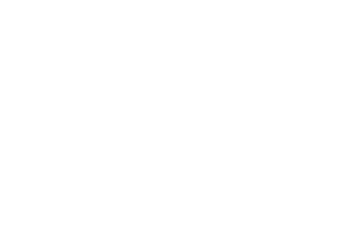

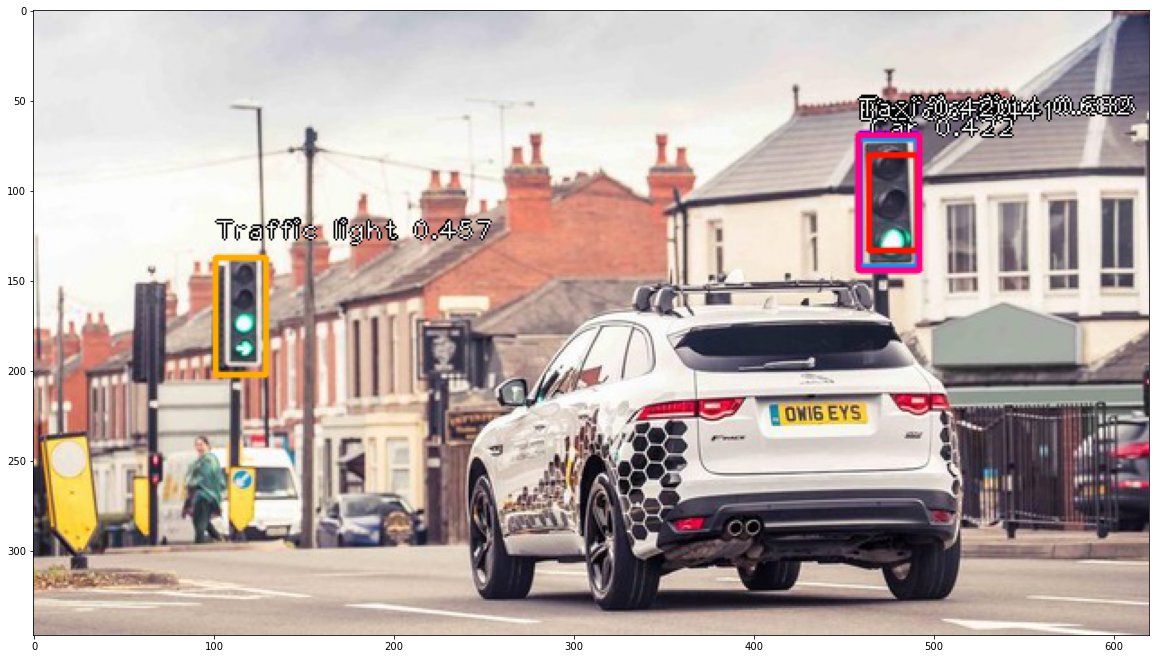

In [28]:
show_detected_objects("JAGYAR-SEMAFORO_xoptimizadax-k4YD--620x349@abc.jpg")